Start by loading dependencies.

In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import random
from matplotlib import cm
#import proplot as pplot

In [2]:
#rocket_cmap = pplot.Colormap('rocket')

In [3]:
#rocket_cmap(1.5)

Specify settings for plots.

In [4]:
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
def_font_size = 18
plt.rcParams.update({'font.size': def_font_size})

Specify the relative path.

In [5]:
relativePath = "./Results/Chapter5_ExcessCVaR/"

Then specify the id.

In [6]:
idRecording = 1
idRecording2 = 1

Then load the files for experiment 1.

In [7]:
# Load Weights vs. Wasserstein radius
nTrainingSizes, nEps, nAssets = (6,51,256)
fileNameWasserstein = "id{}_ExcessModelDRO_WassersteinWeights_Experiment1.csv".format(idRecording)
filePathWasserstein = relativePath + fileNameWasserstein
EX1_W = np.loadtxt(filePathWasserstein).reshape((nTrainingSizes, nEps, nAssets))

# Load out-of-sample performance 
nTrainingSizes, nSim, nEps, nStatistics = (6,200,51,21)
fileNameOoS = "id{}_ExcessModelDRO_OoS_Experiment1.csv".format(idRecording)
filePathOoS = relativePath + fileNameOoS
EX1_OoS = np.loadtxt(filePathOoS).reshape((nTrainingSizes, nSim, nEps, nStatistics))

# Load in-sample performance
nTrainingSizes, nSim, nEps, nStatistics = (6,200,51,21)
fileNameIS = "id{}_ExcessModelDRO_IS_Experiment1.csv".format(idRecording)
filePathIS = relativePath + fileNameIS
EX1_IS = np.loadtxt(filePathIS).reshape((nTrainingSizes, nSim, nEps, nStatistics))

Load the files for experiment 2.

In [8]:
# Load Weights vs. Wasserstein radius
nModels, nTrainingSizes, nSim = (2,10,200)
fileNameJ = "id{}_ExcessModelDRO_J_Experiment2.csv".format(idRecording2)
filePathJ = relativePath + fileNameJ
EX2_J = np.loadtxt(filePathJ).reshape((nModels, nTrainingSizes, nSim))

In [9]:
# Load out-of-sample performance 
nModels, nTrainingSizes, nSim = (2,10,200)
fileNameC = "id{}_ExcessModelDRO_Certificate_Experiment2.csv".format(idRecording2)
fileNameC = relativePath + fileNameC
EX2_C = np.loadtxt(fileNameC).reshape((nModels, nTrainingSizes, nSim))

In [10]:
# Load in-sample performance
nTrainingSizes, nSim  = (10,200)
fileNameE = "id{}_ExcessModelDRO_epsOpt_Experiment2.csv".format(idRecording2)
fileNameE = relativePath + fileNameE
EX2_E = np.loadtxt(fileNameE).reshape((nTrainingSizes, nSim))

## Plots for Experiment 1

## i. Change in Average Portfolio Weights

We define a plot function to make it easy to adjust it.

In [11]:
def plot_subplot(ax, Avg_w_subset, epsCollection, colors, assetNames, title, xlabel, ylabel, legend_loc="best", def_font_size=18):
    
    plt.rcParams.update({'font.size': def_font_size})
    
    wCumSum = np.cumsum(Avg_w_subset, axis=1)

    ax.plot(epsCollection, wCumSum, color='black', linewidth=3)
    ax.fill_between(epsCollection, wCumSum[:, 0], color=colors[0, :], label=assetNames[0])

    for i in range(1, len(assetNames)):
        ax.fill_between(epsCollection, wCumSum[:, i-1], wCumSum[:, i], color=colors[i, :], label=assetNames[i])

    ax.set_xlabel(xlabel, fontsize=def_font_size)
    ax.set_ylabel(ylabel, fontsize=def_font_size)
    ax.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
    ax.set_xscale('log')
    ax.set_title(title)


Set specifics.

In [12]:
# Number related to data
nSim = 200
trainingSizes = np.array([63,126,189,252,504,756])
epsCollection = 10**np.linspace(-6, 0.5, 50)
nEps = len(epsCollection)
beta = 0.80
rho = 2

# Aesthetics
subset_selector = np.random.randint(0, high=EX1_W.shape[2]-1, size=10)
assetNames = np.array(subset_selector, dtype=str)
myMap = plt.get_cmap('inferno') # Paired, inferno
colors = myMap(np.linspace(0,1,len(assetNames)))
#colors = rocket_cmap(np.linspace(0,1,len(assetNames)))

Then we can make the actual plot.

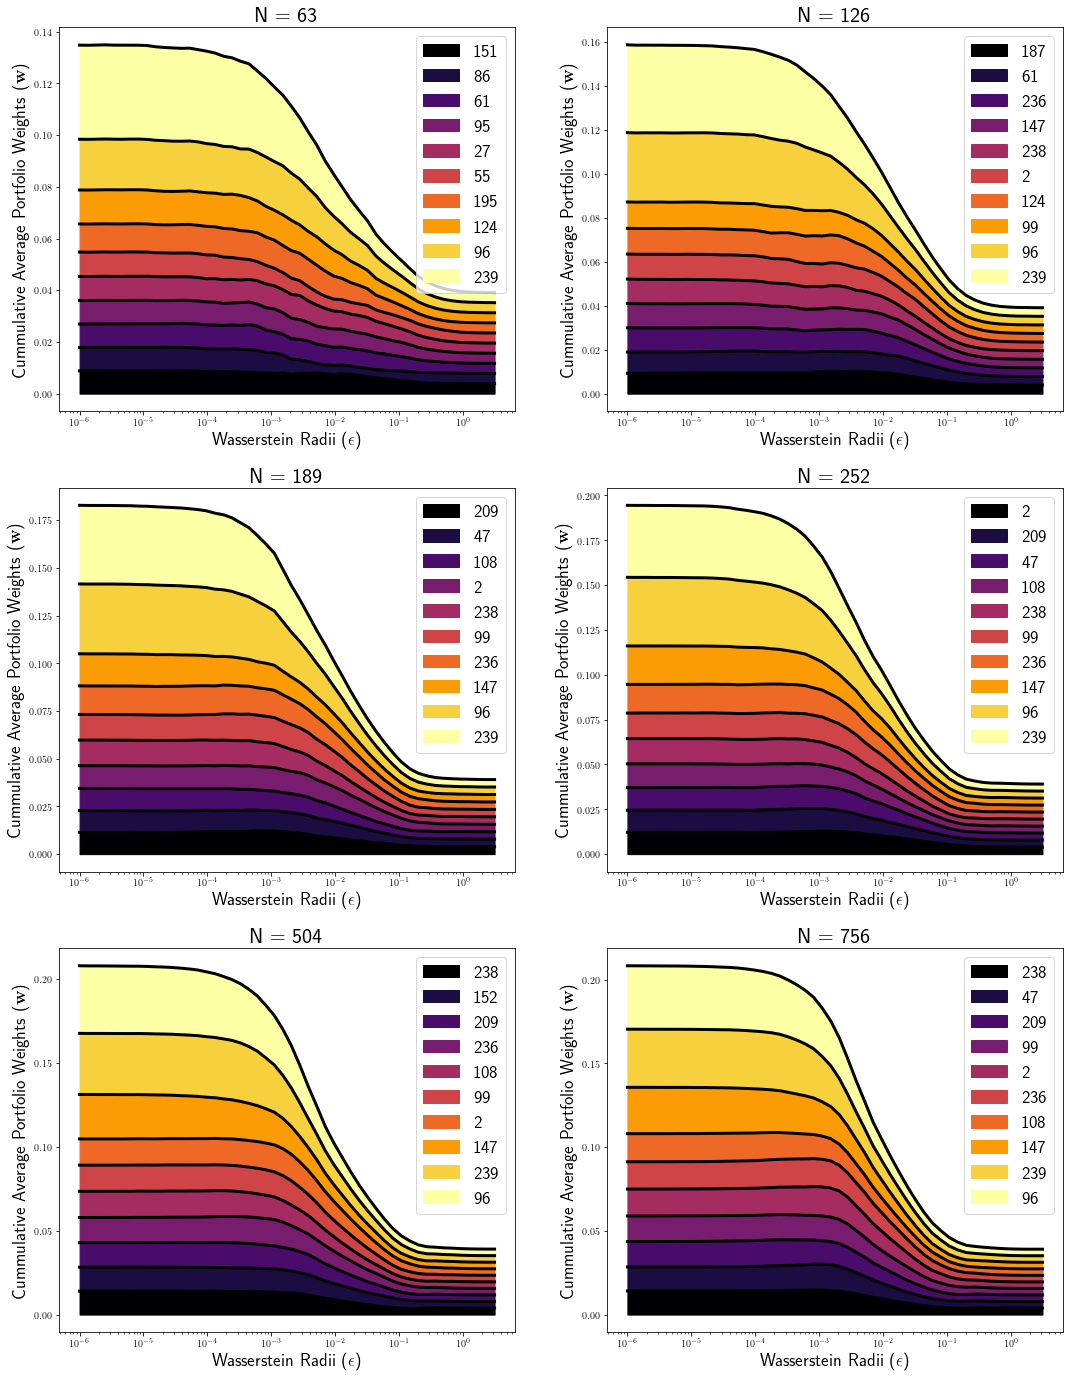

In [13]:
# Create a 2 by 3 grid
nRow = 3
nCols = 2
fig, ax = plt.subplots(nrows=nRow, ncols=nCols, figsize=(18, 24))
def_font_size = 18
plt.rcParams.update({'font.size': def_font_size})

for i in range(nRow):
    for j in range(nCols):
        shift = i * nCols + j
        trainingSize = trainingSizes[shift]
        Avg_w = EX1_W[shift, :, :] / nSim
        subset_selector = np.argsort(Avg_w[0, :])[-10:]
        assetNames = subset_selector
        Avg_w_subset = Avg_w[:-1, subset_selector]

        plot_subplot(ax[i, j], Avg_w_subset, epsCollection, colors, assetNames, 
                     title=f'N = {trainingSize}', 
                     xlabel=r'Wasserstein Radii ($\epsilon$)', 
                     ylabel=r'Cummulative Average Portfolio Weights ($\bf{w}$)',
                     legend_loc="upper right", def_font_size=def_font_size)

# Save figure
relativePathPlots = "./ResultsPlots/Chapter5_ExcessCVaR/"
fileName = 'EXCESS_Fig1_WassersteinWeights_id{}_experiment{}_10LARGEST.pdf'.format(idRecording, 1)
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show figure
plt.show()

We make a single plot of the one with $N = 126$ for the sake of presentation (and maybe the report).

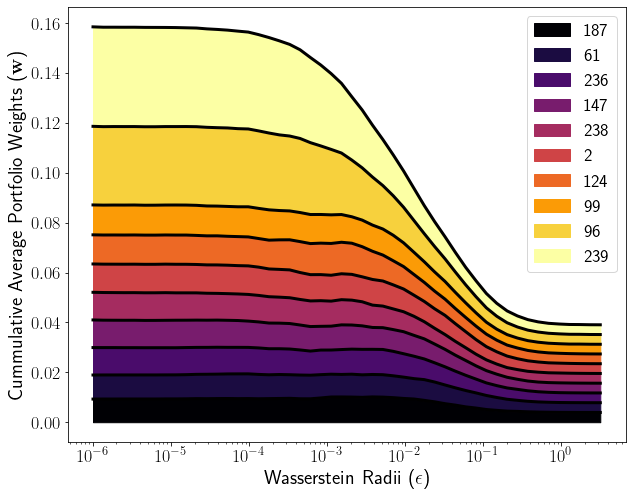

In [14]:
def_font_size = 18
plt.rcParams.update({'font.size': def_font_size})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

shift = 1
trainingSize = trainingSizes[shift]
Avg_w = EX1_W[shift, :, :] / nSim
subset_selector = np.argsort(Avg_w[0, :])[-10:]
assetNames = subset_selector
Avg_w_subset = Avg_w[:-1, subset_selector]

xlabel=r'Wasserstein Radii ($\epsilon$)'
ylabel=r'Cummulative Average Portfolio Weights ($\bf{w}$)'
legend_loc="upper right"

wCumSum = np.cumsum(Avg_w_subset, axis=1)

ax.plot(epsCollection, wCumSum, color='black', linewidth=3)
ax.fill_between(epsCollection, wCumSum[:, 0], color=colors[0, :], label=assetNames[0])

for i in range(1, len(assetNames)):
    ax.fill_between(epsCollection, wCumSum[:, i-1], wCumSum[:, i], color=colors[i, :], label=assetNames[i], alpha=1.0)

ax.set_xlabel(xlabel, fontsize=def_font_size+2)
ax.set_ylabel(ylabel, fontsize=def_font_size+2)
ax.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax.set_xscale('log')
#plt.grid(True)

# Save figure
relativePathPlots = "./ResultsPlots/Chapter5_ExcessCVaR/"
fileName = 'EXCESS_Fig2_WassersteinWeights_id{}_experiment{}_10LARGEST_N126.pdf'.format(idRecording, 1)
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show figure
plt.show()

Then we do a similar plot for the ten smallest entities.

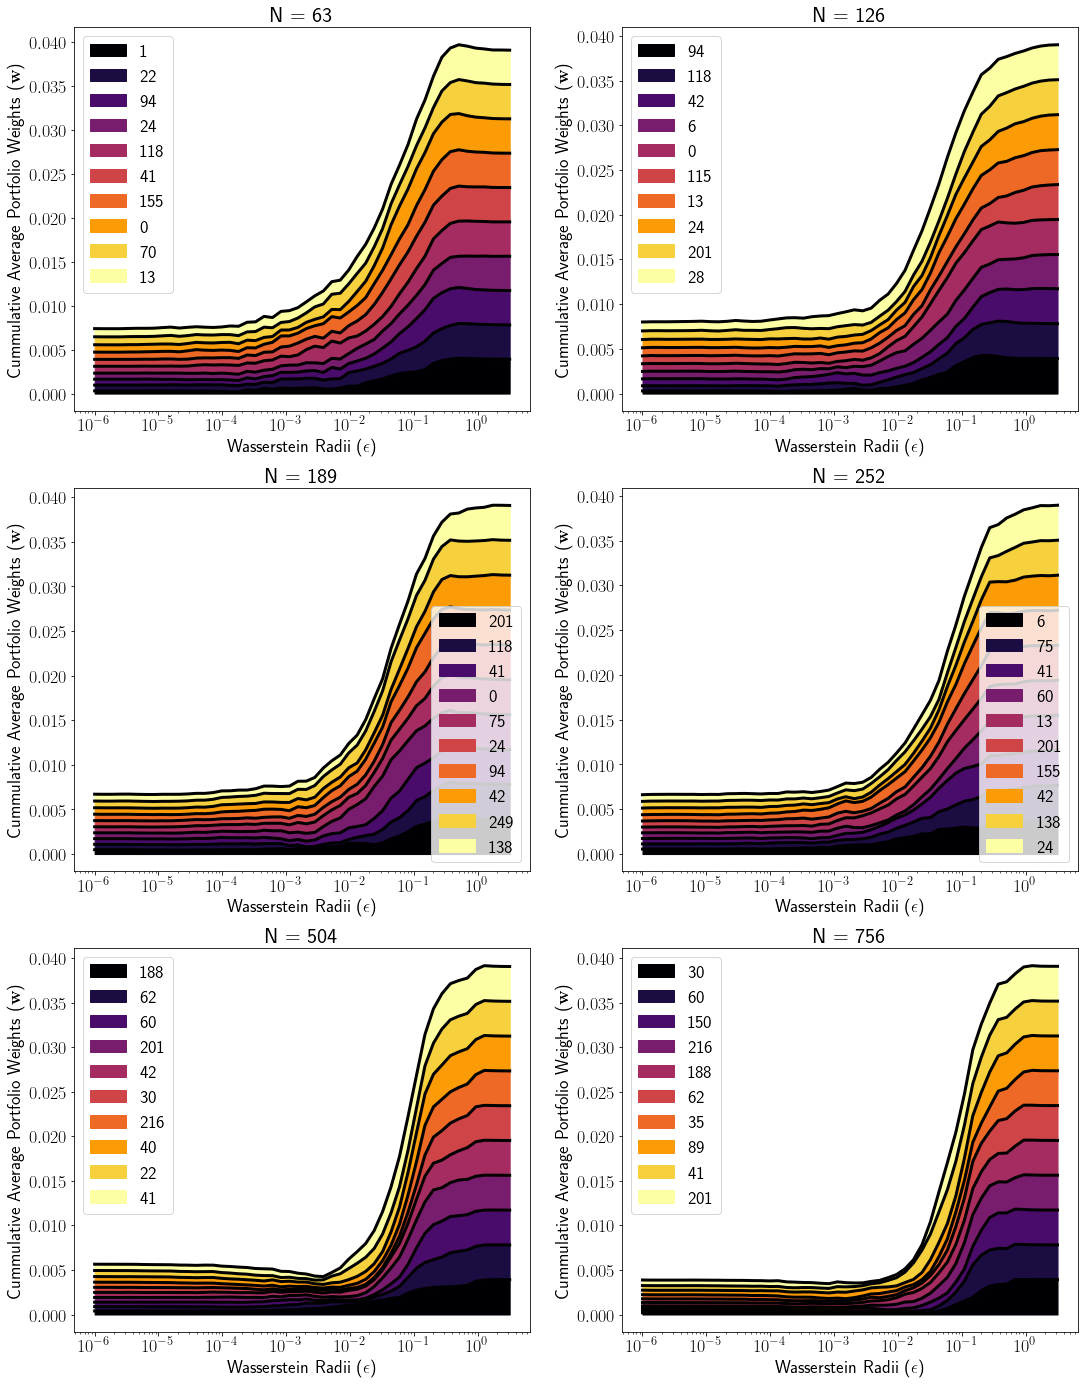

In [15]:
# Create a 2 by 3 grid
nRow = 3
nCols = 2
fig, ax = plt.subplots(nrows=nRow, ncols=nCols, figsize=(18, 24))

for i in range(nRow):
    for j in range(nCols):
        shift = i * nCols + j
        trainingSize = trainingSizes[shift]
        Avg_w = EX1_W[shift, :, :] / nSim
        subset_selector = np.argsort(Avg_w[0, :])[:10]
        assetNames = subset_selector
        Avg_w_subset = Avg_w[:-1, subset_selector]

        plot_subplot(ax[i, j], Avg_w_subset, epsCollection, colors, assetNames, 
                     title=f'N = {trainingSize}', 
                     xlabel=r'Wasserstein Radii ($\epsilon$)', 
                     ylabel=r'Cummulative Average Portfolio Weights ($\bf{w}$)',
                     legend_loc="lower right" if i == 1 else "best")

# Save figure
relativePathPlots = "./ResultsPlots/Chapter5_ExcessCVaR/"
fileName = 'EXCESS_Fig3_WassersteinWeights_id{}_experiment{}_10SMALLEST.pdf'.format(idRecording, 1)
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show figure
plt.show()

For the main content of the report, we only plot a single sample size $N = 126$.

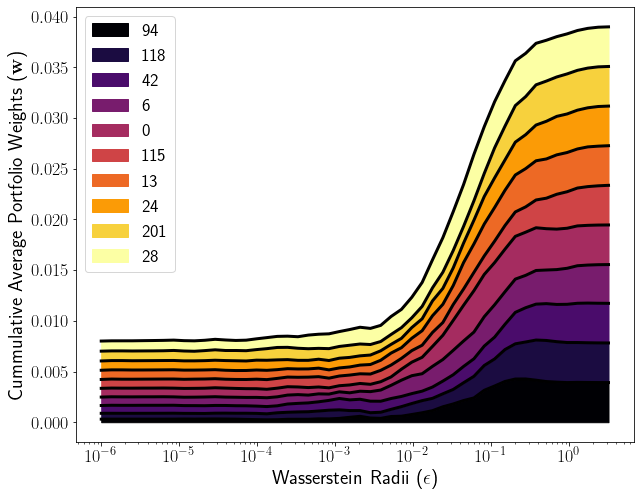

In [16]:
def_font_size = 18
plt.rcParams.update({'font.size': def_font_size})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

shift = 1
trainingSize = trainingSizes[shift]
Avg_w = EX1_W[shift, :, :] / nSim
subset_selector = np.argsort(Avg_w[0, :])[:10]
assetNames = subset_selector
Avg_w_subset = Avg_w[:-1, subset_selector]

xlabel=r'Wasserstein Radii ($\epsilon$)'
ylabel=r'Cummulative Average Portfolio Weights ($\bf{w}$)'
legend_loc="upper left"

wCumSum = np.cumsum(Avg_w_subset, axis=1)

ax.plot(epsCollection, wCumSum, color='black', linewidth=3)
ax.fill_between(epsCollection, wCumSum[:, 0], color=colors[0, :], label=assetNames[0])

for i in range(1, len(assetNames)):
    ax.fill_between(epsCollection, wCumSum[:, i-1], wCumSum[:, i], color=colors[i, :], label=assetNames[i], alpha=1.0)

ax.set_xlabel(xlabel, fontsize=def_font_size+2)
ax.set_ylabel(ylabel, fontsize=def_font_size+2)
ax.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax.set_xscale('log')
#plt.grid(True)

# Save figure
relativePathPlots = "./ResultsPlots/Chapter5_ExcessCVaR/"
fileName = 'EXCESS_Fig4_WassersteinWeights_id{}_experiment{}_10SMALLEST_N126.pdf'.format(idRecording, 1)
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show figure
plt.show()

Then the general case might also be interesting. Here we sample 10 random assets.

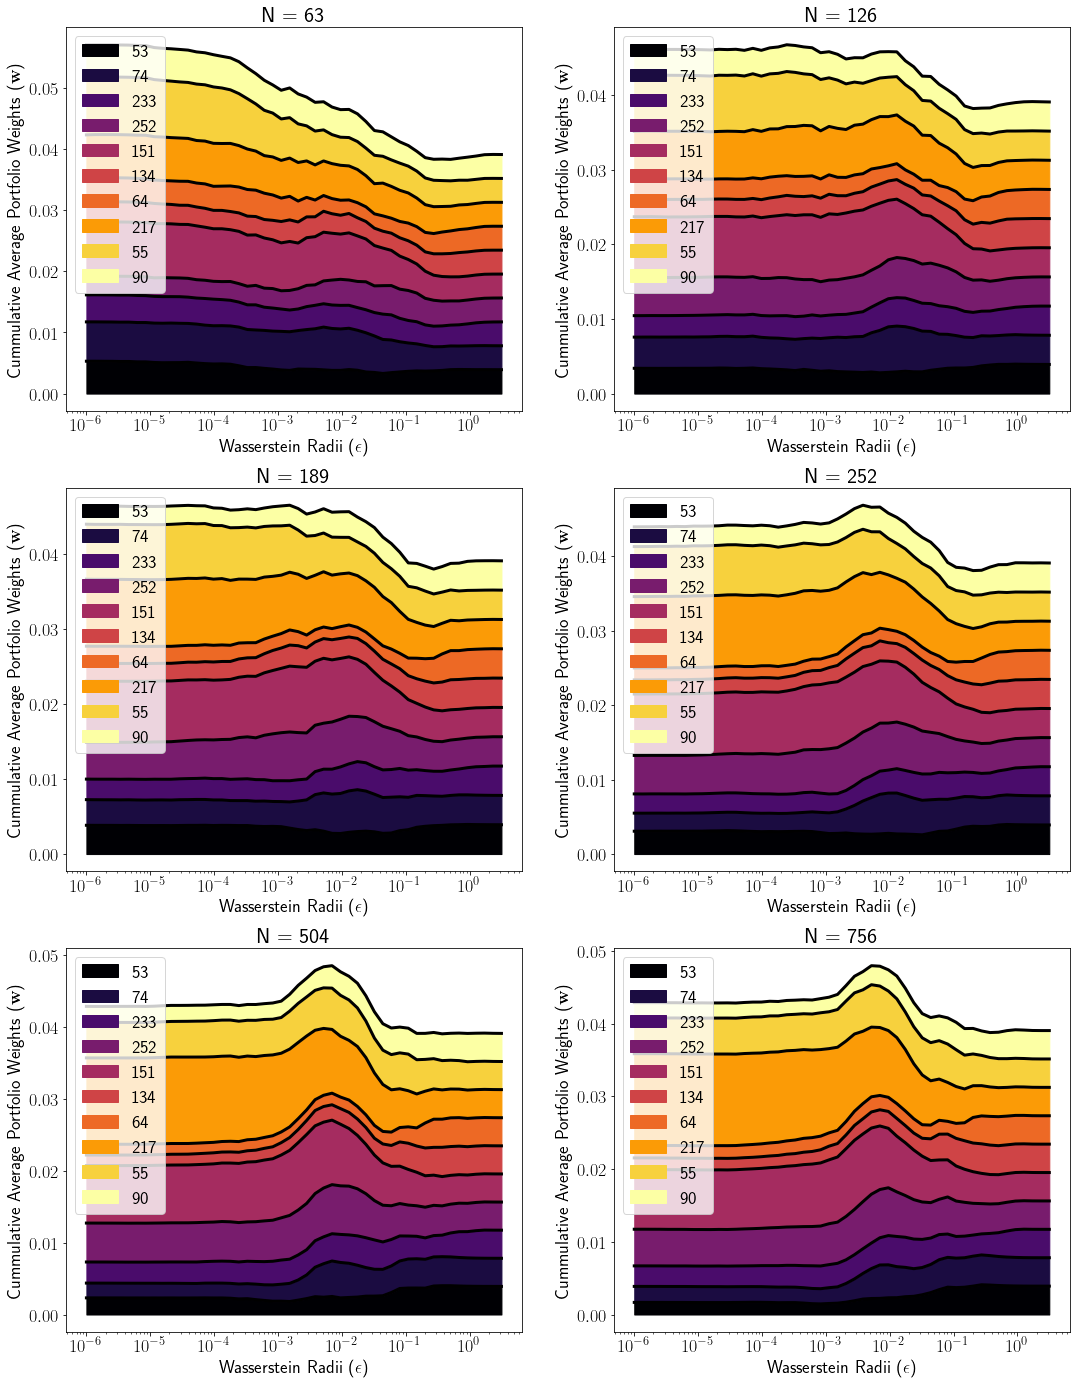

In [17]:
# Create a 2 by 3 grid
nRow = 3
nCols = 2
fig, ax = plt.subplots(nrows=nRow, ncols=nCols, figsize=(18, 24))

# Sample random assets
assetNames = [int(x) for x in random.sample(range(256), 10)]

for i in range(nRow):
    for j in range(nCols):
        shift = i * nCols + j
        trainingSize = trainingSizes[shift]
        Avg_w = EX1_W[shift, :, :] / nSim
        Avg_w_subset = Avg_w[:-1, np.int32(assetNames)]

        plot_subplot(ax[i, j], Avg_w_subset, epsCollection, colors, assetNames, 
                     title=f'N = {trainingSize}', 
                     xlabel=r'Wasserstein Radii ($\epsilon$)', 
                     ylabel=r'Cummulative Average Portfolio Weights ($\bf{w}$)',
                     legend_loc="upper left")

# Save figure
relativePathPlots = "./ResultsPlots/Chapter5_ExcessCVaR/"
fileName = 'EXCESS_Fig5_WassersteinWeights_id{}_experiment{}_10RANDOM.pdf'.format(idRecording, 1)
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show figure
plt.show()

## ii. Dispersion in Average Portfolio Weights

In [18]:
epsCollection.shape

(50,)

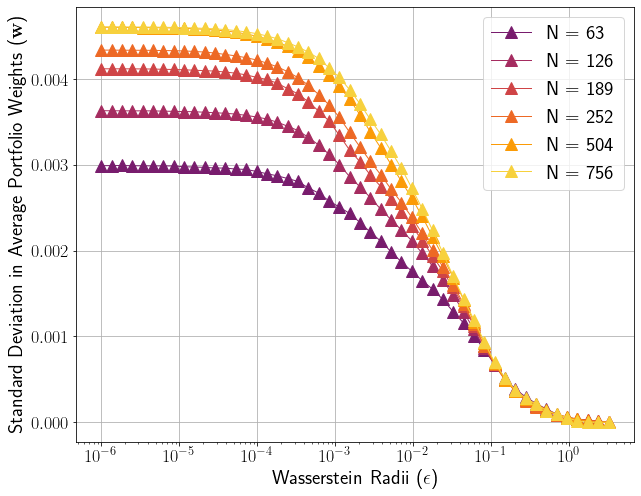

In [19]:
# Specify colors
myMap = plt.get_cmap('inferno') # Paired, inferno
colors = myMap(np.linspace(0,1,len(assetNames)))

# Plot the weights
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

# Now construct the plot
for j in range(EX1_W.shape[0]):
    Avg_w = EX1_W[j,1:,:]/nSim
    ax.plot(epsCollection, np.std(Avg_w, axis=1), marker="^", label="N = {}".format(trainingSizes[j]), markersize=12, color=colors[3+j,:], linewidth=1, alpha=1)
    
ax.set_xlabel(r'Wasserstein Radii ($\epsilon$)', fontsize=20)
ax.set_ylabel(r'Standard Deviation in Average Portfolio Weights ($\bf{w}$)', fontsize=20)
ax.set_xscale('log')
ax.tick_params('both', labelsize=18)
ax.legend(fontsize=20)
ax.grid()
plt.grid(True)

# Save figure
relativePathChapter5Plots = "./ResultsPlots/Chapter5_ExcessCVaR/"
fileName = 'EXCESS_Fig6_WassersteinWeightsDeviation_id{}_experiment{}.pdf'.format(idRecording, 1)
relativeFilePath = relativePathChapter5Plots + fileName
plt.savefig(relativeFilePath, dpi=200)

# Show figure
plt.show()

## iii. Out-of-Sample Performance and Reliability

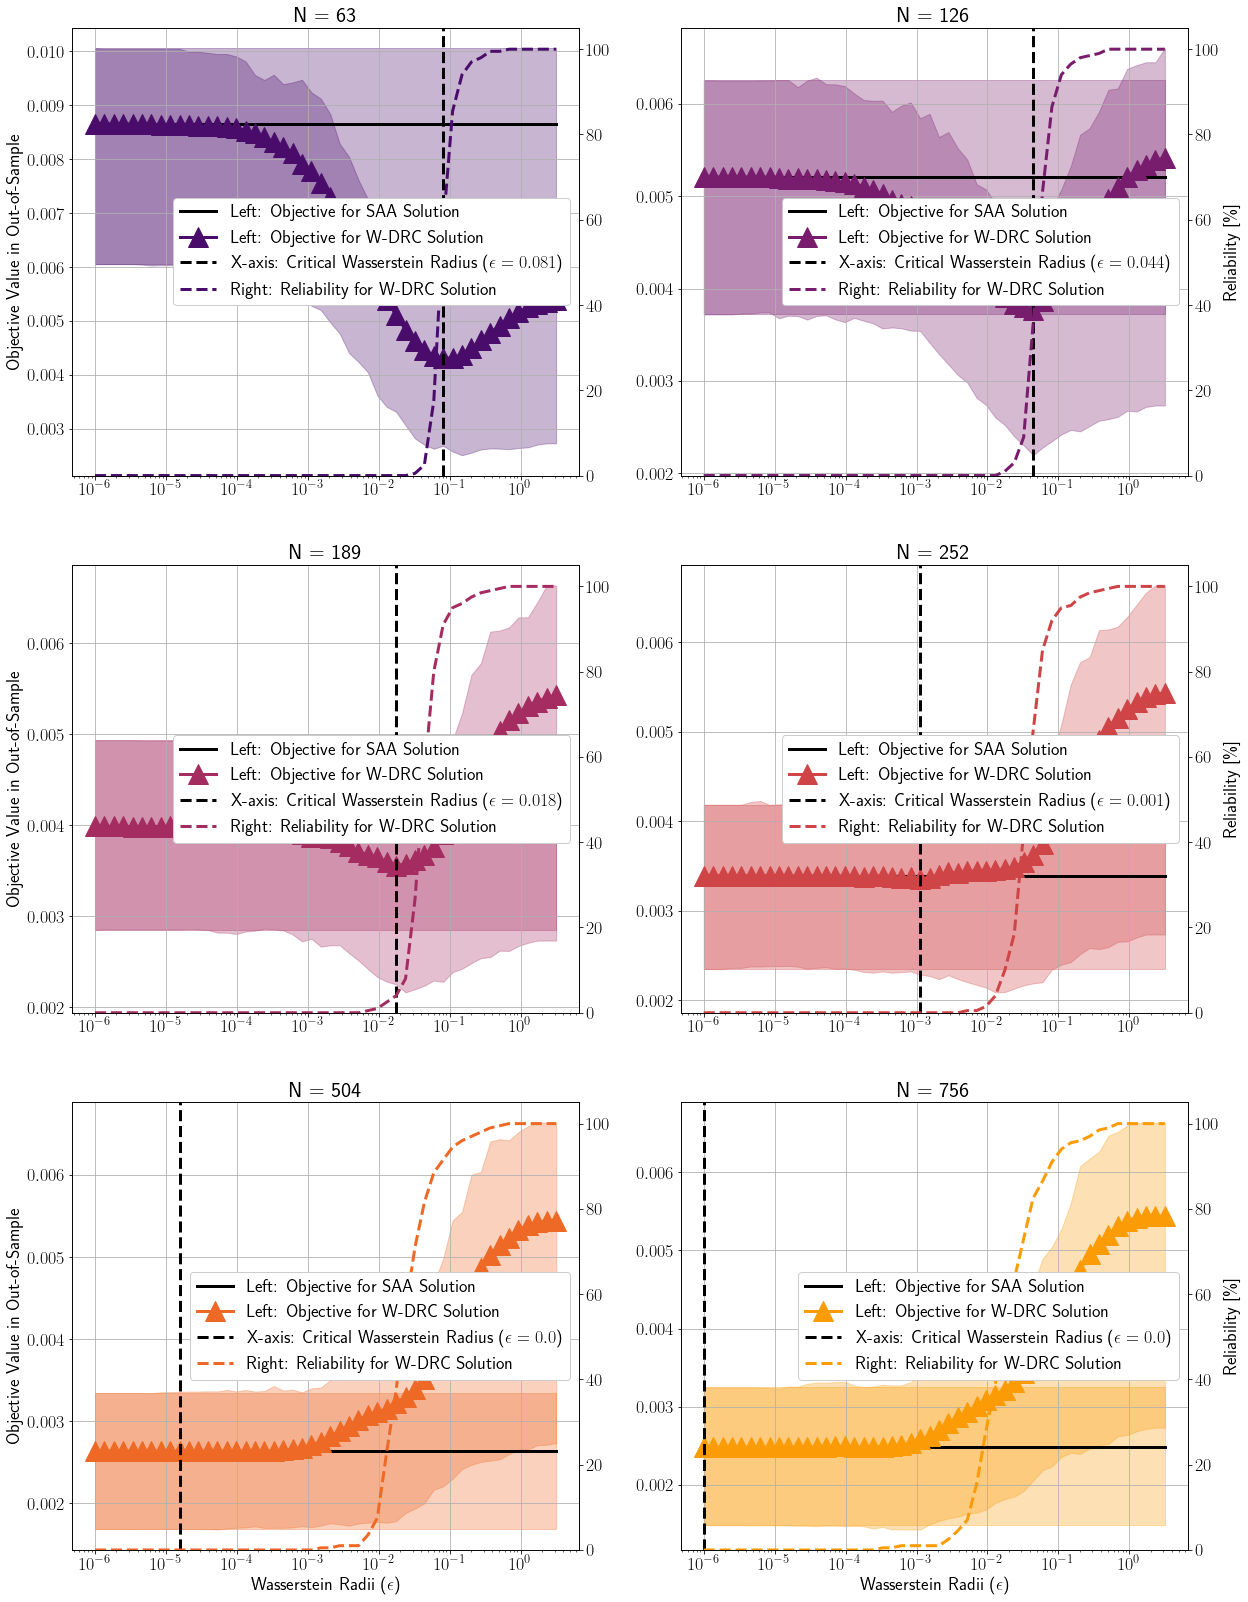

In [20]:
def plot_dual_objectives(ax, meanJ_SAA, P20J_SAA, P80J_SAA, meanJ_DRO, P20J_DRO, P80J_DRO, reliability, critical_radius, title_suffix, xlabel, ylabel, fontSize, ylabel_right):
    
    ax.plot(epsCollection, meanJ_SAA, linewidth=3, color='black', label=r"Left: Objective for SAA Solution")
    ax.fill_between(epsCollection, P20J_SAA, P80J_SAA, color=colors[choiceColor, :], alpha=0.3)
    ax.plot(epsCollection, meanJ_DRO, marker="^", markersize=20, color=colors[choiceColor, :], linewidth=3,
                 label="Left: Objective for W-DRC Solution")
    ax.fill_between(epsCollection, P20J_DRO, P80J_DRO, color=colors[choiceColor, :], alpha=0.3)

    ax.set_xlabel(xlabel, fontsize=fontSize)
    ax.set_ylabel(ylabel, fontsize=fontSize)
    ax.set_xscale('log')
    ax.tick_params(axis='x', labelsize=fontSize)  # Increase x-axis tick label font size
    ax.tick_params(axis='y', labelsize=fontSize)  # Increase y-axis tick label font size
    ax.grid()

    # Construct the reliability plot
    axTwinx = ax.twinx()
    axTwinx.plot(epsCollection, reliability, color=colors[choiceColor, :], linewidth=3, linestyle="--",
                 label="Right: Reliability for W-DRC Solution")
    axTwinx.set_yticks(np.arange(0, 120, 20))
    axTwinx.set_ylim(0, 105)
    axTwinx.set_ylabel(ylabel_right, fontsize=fontSize)
    axTwinx.tick_params(axis='y', labelsize=fontSize)

    # Plot critical Wasserstein Radius
    ax.axvline(x=critical_radius, color='black', linewidth=3, linestyle="--",
               label=r'X-axis: Critical Wasserstein Radius ($\epsilon = {}$)'.format(round(critical_radius, 3)))

    # Construct legends
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = axTwinx.get_legend_handles_labels()
    axTwinx.legend(lines + lines2, labels + labels2, fontsize=fontSize, framealpha=1, facecolor='white', loc='best')

    ax.set_title(title_suffix)

# Set specifics
fontSize = 18
myMap = plt.get_cmap('inferno')  # Paired, inferno
colors = myMap(np.linspace(0, 1, len(assetNames)))

nRows = 3
nCols = 2

# Plot the dual objectives
fig, ax = plt.subplots(nrows=nRows, ncols=nCols, figsize=(20, 28))
plt.rcParams.update({'font.size': def_font_size})
plt.xticks(fontsize=fontSize)
plt.yticks(fontsize=fontSize)

# Initialize counters
choiceColor = 2
TS = 0

for i in range(nRows):
    for j in range(nCols):
        
        # Plot SAA
        meanJ_SAA = np.repeat(np.mean(EX1_OoS[TS, :, 0, 0]), len(epsCollection))
        P80J_SAA = np.repeat(np.quantile(EX1_OoS[TS, :, 0, 0], 0.80), len(epsCollection))
        P20J_SAA = np.repeat(np.quantile(EX1_OoS[TS, :, 0, 0], 0.20), len(epsCollection))

        # Plot OoS as a function of Wasserstein Radius
        meanJ_DRO = np.mean(EX1_OoS[TS, :, :-1, 0].T, axis=1)
        P80J_DRO = np.quantile(EX1_OoS[TS, :, :-1, 0].T, 0.80, axis=1)
        P20J_DRO = np.quantile(EX1_OoS[TS, :, :-1, 0].T, 0.20, axis=1)

        if i == nRows - 1:
            xlabel = r'Wasserstein Radii ($\epsilon$)'
        else:
            xlabel = ''

        if j == 0:
            ylabel_left = r'Objective Value in Out-of-Sample'
            ylabel_right = ''
        else:
            ylabel_left = ''
            ylabel_right = r'Reliability [\%]'

        plot_dual_objectives(ax[i, j], meanJ_SAA, P20J_SAA, P80J_SAA, meanJ_DRO, P20J_DRO, P80J_DRO,
                              reliability=(np.sum(EX1_OoS[TS, :, :-1, 0] < EX1_IS[TS, :, :-1, 0], axis=0) / nSim) * 100,
                              critical_radius=epsCollection[np.argmin(meanJ_DRO[:-1])],
                              title_suffix='N = {}'.format(trainingSizes[TS]),
                              xlabel=xlabel,
                              ylabel=ylabel_left, ylabel_right=ylabel_right, fontSize=fontSize)

        # Increase color and TS
        choiceColor += 1
        TS += 1

# Save figure
relativePathChapter5Plots = "./ResultsPlots/Chapter5_ExcessCVaR/"
fileName = 'EXCESS_Fig7_OoSPerformanceSeparate_id{}_experiment{}.pdf'.format(idRecording, 1)
relativeFilePath = relativePathChapter5Plots + fileName
plt.savefig(relativeFilePath, dpi=200)

# Show plot
plt.show()

The following plot is only for comparison.

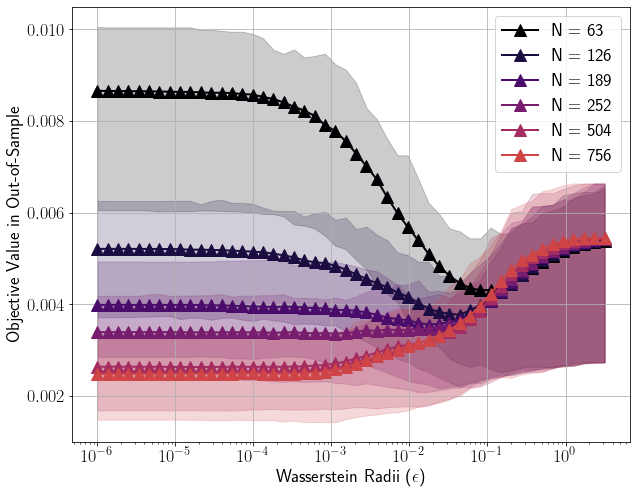

In [21]:
# Specify font size
fontSize = 18

# Specify colors
myMap = plt.get_cmap('inferno') # Paired, inferno
colors = myMap(np.linspace(0,1,len(assetNames)))

# Plot the weights
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
plt.xticks(fontsize=fontSize)
plt.yticks(fontsize=fontSize)

colorChoice = 5
colorChoiceRel = 5

for idxTS, TS in enumerate(trainingSizes):

    # Plot OoS as function of Wasserstein Radius
    meanJ = np.mean(EX1_OoS[idxTS,:,:-1,0].T, axis=1)
    P80J = np.quantile(EX1_OoS[idxTS,:,:-1,0].T, 0.80, axis=1)
    P20J = np.quantile(EX1_OoS[idxTS,:,:-1,0].T, 0.20, axis=1)
    ax.plot(epsCollection, meanJ, 
                marker="^", markersize=12, color=colors[idxTS,:], linewidth=2, label="N = {}".format(TS))
    ax.fill_between(epsCollection, P20J, P80J, color=colors[idxTS,:], alpha=0.2)

ax.set_xlabel(r'Wasserstein Radii ($\epsilon$)', fontsize=fontSize)
ax.set_ylabel(r'Objective Value in Out-of-Sample', fontsize=fontSize)
ax.set_xscale('log')
ax.grid(True)

# Set legends
ax.legend(fontsize=fontSize)

# Save figure
relativePathChapter5Plots = "./ResultsPlots/Chapter5_ExcessCVaR/"
fileName = 'EXCESS_Fig8_OoSPerformanceAggregate_id{}_experiment{}.pdf'.format(idRecording, 1)
relativeFilePath = relativePathChapter5Plots + fileName
plt.savefig(relativeFilePath, dpi=200)

# Show plot
plt.show()

Then we make a single plot for some N to investigate how the uncertainty is affected.

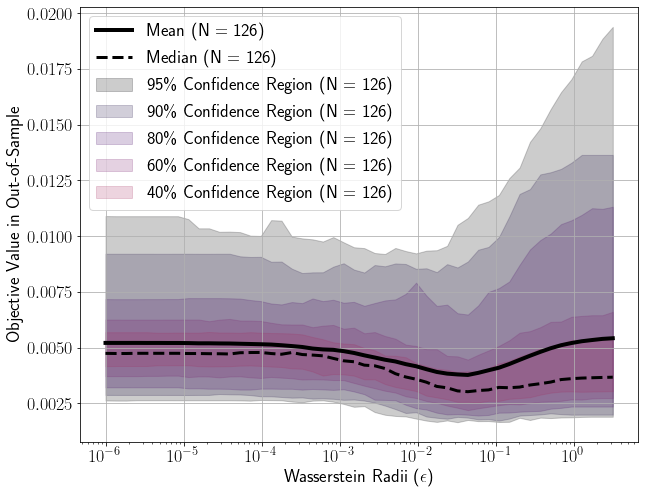

In [22]:
# Specify font size
fontSize = 18

# Specify colors
myMap = plt.get_cmap('inferno') # Paired, inferno
colors = myMap(np.linspace(0,1,len(assetNames)))

# Plot the weights
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
plt.xticks(fontsize=fontSize)
plt.yticks(fontsize=fontSize)

colorChoice = 5
colorChoiceRel = 5

TS = 126
idxTS = np.argwhere(trainingSizes == TS)[0,0]

# Plot OoS as function of Wasserstein Radius
meanJ = np.mean(EX1_OoS[idxTS,:,:-1,0].T, axis=1)
medianJ = np.median(EX1_OoS[idxTS,:,:-1,0].T, axis=1)
P70J = np.quantile(EX1_OoS[idxTS,:,:-1,0].T, 0.70, axis=1)
P30J = np.quantile(EX1_OoS[idxTS,:,:-1,0].T, 0.30, axis=1)
P80J = np.quantile(EX1_OoS[idxTS,:,:-1,0].T, 0.80, axis=1)
P20J = np.quantile(EX1_OoS[idxTS,:,:-1,0].T, 0.20, axis=1)
P90J = np.quantile(EX1_OoS[idxTS,:,:-1,0].T, 0.90, axis=1)
P10J = np.quantile(EX1_OoS[idxTS,:,:-1,0].T, 0.10, axis=1)
P95J = np.quantile(EX1_OoS[idxTS,:,:-1,0].T, 0.95, axis=1)
P05J = np.quantile(EX1_OoS[idxTS,:,:-1,0].T, 0.05, axis=1)
P975J = np.quantile(EX1_OoS[idxTS,:,:-1,0].T, 0.975, axis=1)
P025J = np.quantile(EX1_OoS[idxTS,:,:-1,0].T, 0.025, axis=1)

#ax.plot(epsCollection, meanJ, 
            #marker="^", markersize=12, color=colors[idxTS,:], linewidth=2, label="Mean".format(TS))
ax.plot(epsCollection, meanJ, color='black', linewidth=4, label="Mean (N = {})".format(TS))
ax.plot(epsCollection, medianJ, color='black', linestyle="--", linewidth=3, label="Median (N = {})".format(TS))
ax.fill_between(epsCollection, P025J, P975J, color=colors[idxTS-1,:], alpha=0.2, label="95\% Confidence Region (N = {})".format(TS))
ax.fill_between(epsCollection, P05J, P95J, color=colors[idxTS,:], alpha=0.2, label="90\% Confidence Region (N = {})".format(TS))
ax.fill_between(epsCollection, P10J, P90J, color=colors[idxTS+1,:], alpha=0.2, label="80\% Confidence Region (N = {})".format(TS))
ax.fill_between(epsCollection, P20J, P80J, color=colors[idxTS+2,:], alpha=0.2, label="60\% Confidence Region (N = {})".format(TS))
ax.fill_between(epsCollection, P30J, P70J, color=colors[idxTS+3,:], alpha=0.2, label="40\% Confidence Region (N = {})".format(TS))

# Axis
ax.set_xlabel(r'Wasserstein Radii ($\epsilon$)', fontsize=fontSize)
ax.set_ylabel(r'Objective Value in Out-of-Sample', fontsize=fontSize)
ax.set_xscale('log')
ax.grid(True)

# Set legends
ax.legend(fontsize=fontSize, loc="upper left")

# Save figure
relativePathChapter5Plots = "./ResultsPlots/Chapter5_ExcessCVaR/"
fileName = 'EXCESS_Fig9_OoSPerformanceAggregate_id{}_experiment{}_SINGLE.pdf'.format(idRecording, 1)
relativeFilePath = relativePathChapter5Plots + fileName
plt.savefig(relativeFilePath, dpi=200)

# Show plot
plt.show()

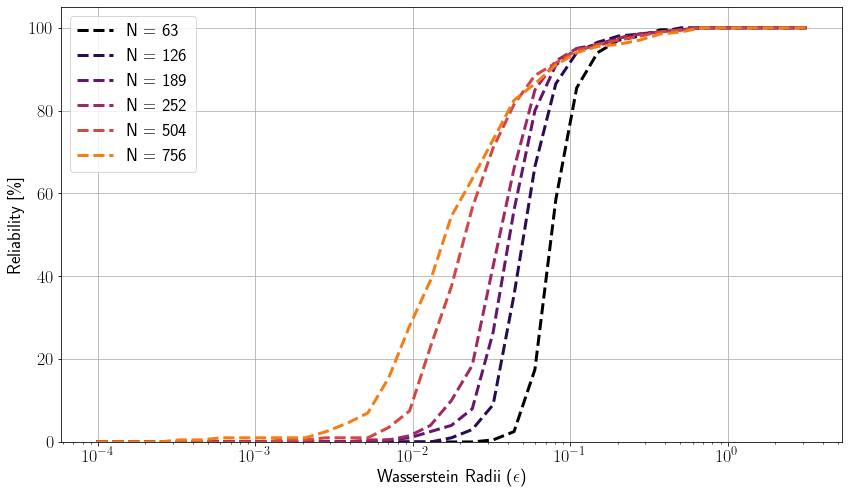

In [23]:
# Specify font size
fontSize = 18

# Specify colors
myMap = plt.get_cmap('inferno')  # Paired, inferno
colors = myMap(np.linspace(0, 1, 8))

# Plot the weights
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
ax.tick_params(axis='both', which='both', labelsize=fontSize)  # Set font size for both x and y axes
ax.grid()

# Loop over all training sizes
for idxTS, TS in enumerate(trainingSizes):
    # Construct the reliability plot
    relMatrix = EX1_OoS[idxTS, :, 15:-1, 0] < EX1_IS[idxTS, :, 15:-1, 0]
    totalSim = EX1_OoS[idxTS, :, 15:-1, 0].shape[0]
    reliabibility = (np.sum(relMatrix, axis=0) / nSim) * 100
    ax.plot(epsCollection[15:], reliabibility, color=colors[idxTS, :], linewidth=3, linestyle="--", label="N = {}".format(TS))

# Specify details on plot
ax.set_yticks(np.arange(0, 120, 20))
ax.set_ylim(0, 105)
ax.set_xlabel(r'Wasserstein Radii ($\epsilon$)', fontsize=fontSize)
ax.set_ylabel(r'Reliability [\%]', fontsize=fontSize)
ax.set_xscale('log')
ax.legend(fontsize=fontSize)

# Save figure
relativePathChapter5Plots = "./ResultsPlots/Chapter5_ExcessCVaR/"
fileName = 'EXCESS_Fig10_Realiability_id{}_experiment{}.pdf'.format(idRecording, 1)
relativeFilePath = relativePathChapter5Plots + fileName
plt.savefig(relativeFilePath, dpi=200)

# Show plot
plt.show()

## Plots for Experiment 2

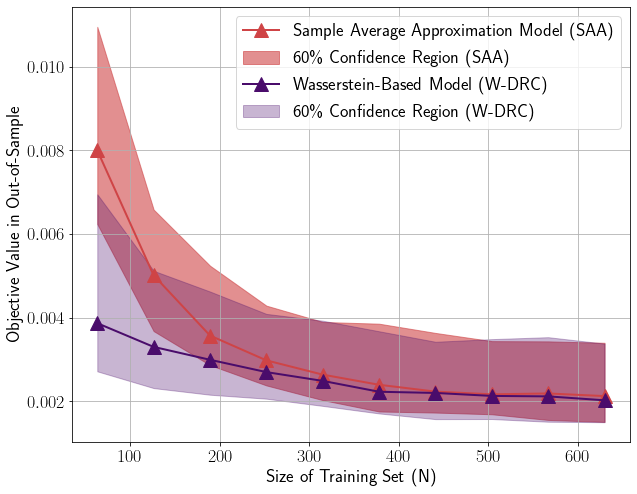

In [24]:
# Get right training sizes
trainingSizes = np.linspace(63,63*10,10, dtype=np.int16) 

# Set font size
fontSizeTickers = 18
fontSize = 18

# Specify colors
myMap = plt.get_cmap('inferno') # Paired, inferno
colors = myMap(np.linspace(0,1,10))

# Set colors from the scale used for plotting the weights
colorDRO = colors[2]
colorSAA = colors[5]

# Control the width of the confidence intervals
lower = 0.20
upper = 0.80

# Prepare plots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
plt.xticks(fontsize=fontSizeTickers)
plt.yticks(fontsize=fontSizeTickers)
ax.tick_params(axis='x', labelsize=fontSizeTickers)  # Increase x-axis tick label font size
ax.tick_params(axis='y', labelsize=fontSizeTickers)  # Increase y-axis tick label font size

# Plot the OoS-performance
J_SAA = EX2_J[0,:,:].T
ax.plot(trainingSizes, np.median(J_SAA, axis=0), color=colorSAA, linewidth=2, marker="^", markersize=14, label="Sample Average Approximation Model (SAA)")
ax.fill_between(trainingSizes, np.quantile(J_SAA, lower, axis=0), np.quantile(J_SAA, upper, axis=0), color=colorSAA, alpha=0.6, label=r"60\% Confidence Region (SAA)")
J_DRO = EX2_J[1,:,:].T
ax.plot(trainingSizes, np.median(J_DRO, axis=0), color=colorDRO, linewidth=2, marker="^", markersize=14, label="Wasserstein-Based Model (W-DRC)")
ax.fill_between(trainingSizes, np.quantile(J_DRO, lower, axis=0), np.quantile(J_DRO, upper, axis=0), color=colorDRO, alpha=0.3, label=r"60\% Confidence Region (W-DRC)")
ax.set_xlabel(r'Size of Training Set (N)', fontsize=fontSize)
ax.set_ylabel(r'Objective Value in Out-of-Sample', fontsize=fontSize)
ax.legend(loc="best", facecolor="white", fontsize=fontSize)
plt.grid(True)

# Save figure
relativePathChapter5Plots = "./ResultsPlots/Chapter5_ExcessCVaR/"
fileName = 'EXCESS_Fig11_HoldOutOoS_id{}_experiment{}.pdf'.format(idRecording2, 2)
relativeFilePath = relativePathChapter5Plots + fileName
plt.savefig(relativeFilePath, dpi=200)

# Show figure
plt.show()

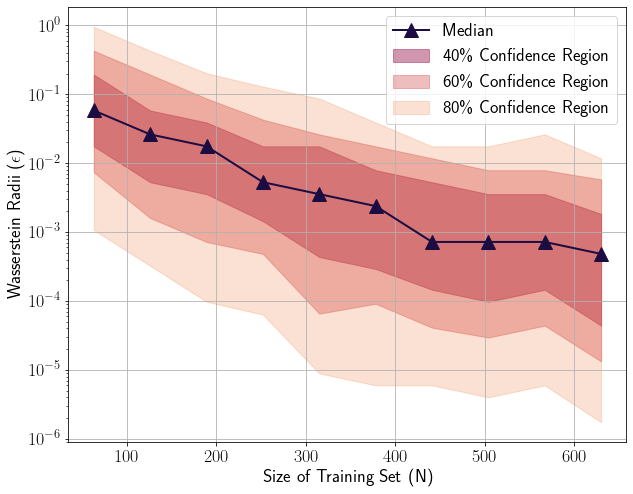

In [25]:
# Get right training sizes
trainingSizes = np.linspace(63,63*10,10, dtype=np.int16) 

# Set font size
fontSizeTickers = 18
fontSize = 18

# Specify colors
myMap = plt.get_cmap('inferno') # Paired, inferno
colors = myMap(np.linspace(0,1,10))

# Set colors from the scale used for plotting the weights
color = colors[1]
color1 = colors[4]
color2 = colors[5]
color3 = colors[6]

# Control the width of the confidence intervals
lower1 = 0.30
upper1 = 0.70
lower2 = 0.20
upper2 = 0.80
lower3 = 0.10
upper3 = 0.90

# Prepare plots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
plt.xticks(fontsize=fontSizeTickers)
plt.yticks(fontsize=fontSizeTickers)
ax.tick_params(axis='x', labelsize=fontSize)  # Increase x-axis tick label font size
ax.tick_params(axis='y', labelsize=fontSize)  # Increase y-axis tick label font size

# Plot the OoS-performance
ax.plot(trainingSizes, np.quantile(EX2_E, 0.50, axis=1), color=color, linewidth=2, marker="^", markersize=14, label="Median")
ax.fill_between(trainingSizes, np.quantile(EX2_E, lower1, axis=1), np.quantile(EX2_E, upper1, axis=1), color=color1, alpha=0.5, label=r"40\% Confidence Region")
ax.fill_between(trainingSizes, np.quantile(EX2_E, lower2, axis=1), np.quantile(EX2_E, upper2, axis=1), color=color2, alpha=0.35, label=r"60\% Confidence Region")
ax.fill_between(trainingSizes, np.quantile(EX2_E, lower3, axis=1), np.quantile(EX2_E, upper3, axis=1), color=color3, alpha=0.2, label=r"80\% Confidence Region")
ax.set_xlabel(r'Size of Training Set (N)', fontsize=fontSize)
ax.set_ylabel(r'Wasserstein Radii ($\epsilon$)', fontsize=fontSize)
ax.set_yscale('log')
plt.grid(True)

# Save figure
ax.legend(fontsize=fontSize)
relativePathChapter5Plots = "./ResultsPlots/Chapter5_ExcessCVaR/"
fileName = 'EXCESS_Fig12_HoldOutAverage_id{}_experiment{}.pdf'.format(idRecording2, 2)
relativeFilePath = relativePathChapter5Plots + fileName
plt.savefig(relativeFilePath, dpi=200)


# Show figure
plt.show()

## Additional Plots (Testing different things out)

We will plot a variant of an efficient frontier.

In [26]:
# Pick training size
trainingSize = 2

epsCollection = 10**np.linspace(-6, 0.5, 50)

OoS_CVaR = EX1_OoS[trainingSize,:,:,5]
OoS_EXCESS = EX1_OoS[trainingSize,:,:,6]

IS_CVaR = EX1_IS[trainingSize,:,:,5]
IS_EXCESS = EX1_IS[trainingSize,:,:,6]

We start by trying the means.

In [27]:
np.mean(OoS_CVaR, axis=0)

array([0.0020675 , 0.00206747, 0.00206758, 0.0020673 , 0.00206677,
       0.0020665 , 0.00206651, 0.00206626, 0.00206691, 0.00206665,
       0.00206546, 0.00206318, 0.00206382, 0.00206109, 0.00205868,
       0.00205293, 0.00204772, 0.00204212, 0.00204277, 0.0020405 ,
       0.00203016, 0.00202337, 0.00201878, 0.00200471, 0.00199768,
       0.00198423, 0.00196759, 0.0019401 , 0.00191367, 0.0018881 ,
       0.00186622, 0.00184499, 0.00182721, 0.00182514, 0.00184622,
       0.00188574, 0.00193919, 0.0020231 , 0.00212064, 0.00222668,
       0.00233487, 0.00245475, 0.00253783, 0.00261222, 0.00267454,
       0.00272201, 0.00276452, 0.0027962 , 0.00282533, 0.00283908,
       0.        ])

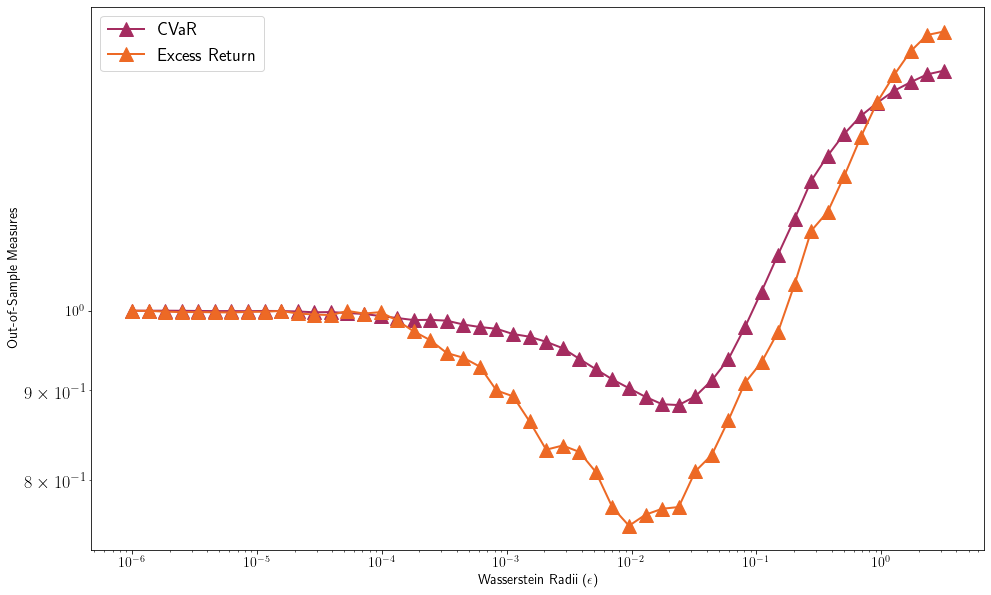

In [28]:
# Set font size
fontSizeTickers = 14
fontSize = 14

# Specify colors
myMap = plt.get_cmap('inferno') # Paired, inferno
colors = myMap(np.linspace(0,1,10))

# Prepare plots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))
plt.xticks(fontsize=fontSizeTickers)
plt.yticks(fontsize=fontSizeTickers)
ax.tick_params(axis='x', labelsize=fontSize)  # Increase x-axis tick label font size
ax.tick_params(axis='y', labelsize=fontSize)  # Increase y-axis tick label font size

# Plot the OoS-performance
ax.plot(epsCollection, np.mean(OoS_CVaR, axis=0)[:-1]/np.mean(OoS_CVaR, axis=0)[0], color=colors[4], linewidth=2, marker="^", markersize=14, label="CVaR")
ax.plot(epsCollection, np.mean(OoS_EXCESS, axis=0)[:-1]/np.mean(OoS_EXCESS, axis=0)[0], color=colors[6], linewidth=2, marker="^", markersize=14, label="Excess Return")
ax.set_xlabel(r'Wasserstein Radii ($\epsilon$)', fontsize=fontSize)
ax.set_ylabel(r'Out-of-Sample Measures', fontsize=fontSize)
ax.set_yscale('log')
ax.set_xscale('log')

# Show figure
plt.legend()
plt.show()

Then we make an efficient frontier.

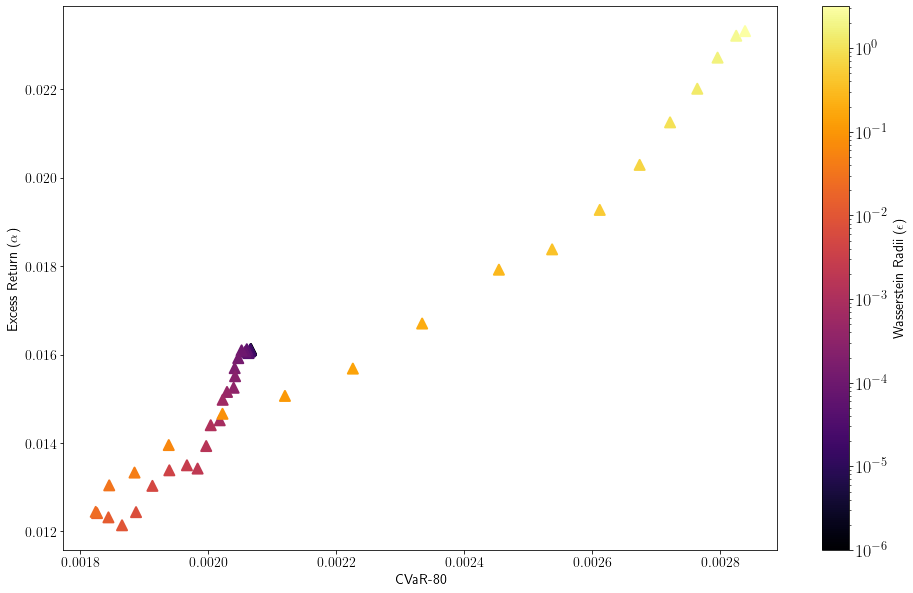

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LogNorm

# Set font size
fontSizeTickers = 14
fontSize = 14

# Specify colors
myMap = plt.get_cmap('inferno')  # Paired, inferno
colors = myMap(np.linspace(10**(-6), 1, 10))

# Prepare plots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))
plt.xticks(fontsize=fontSizeTickers)
plt.yticks(fontsize=fontSizeTickers)
ax.tick_params(axis='x', labelsize=fontSize)  # Increase x-axis tick label font size
ax.tick_params(axis='y', labelsize=fontSize)  # Increase y-axis tick label font size

# Plot the OoS-performance
sc = ax.scatter(
    np.mean(OoS_CVaR, axis=0)[:-1],
    np.mean(OoS_EXCESS, axis=0)[:-1],
    c=epsCollection,
    cmap=myMap,
    linewidth=2,
    marker="^",
    s=100,
    norm=LogNorm(vmin=np.min(epsCollection), vmax=np.max(epsCollection))
)

# Create a ScalarMappable object
sm = ScalarMappable(cmap=myMap, norm=LogNorm(vmin=np.min(epsCollection), vmax=np.max(epsCollection)))
sm.set_array(epsCollection)

# Add colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(r'Wasserstein Radii ($\epsilon$)', fontsize=fontSize)

#ax.set_xscale('log')  # Set x-axis to log scale
#ax.set_yscale('log')  # Set y-axis to log scale
ax.set_xlabel(r'CVaR-80', fontsize=fontSize)
ax.set_ylabel(r'Excess Return ($\alpha$)', fontsize=fontSize)

# Show figure
plt.show()

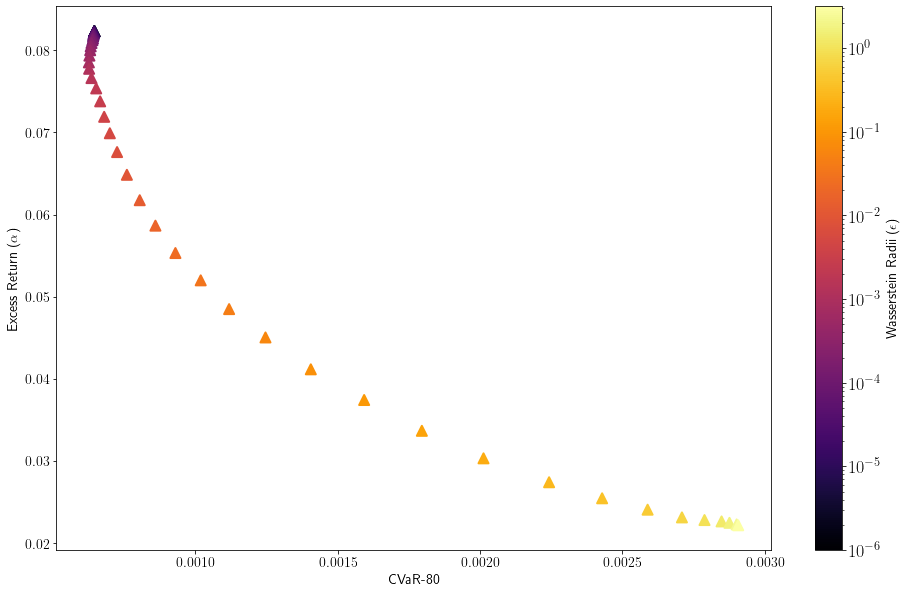

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LogNorm

# Set font size
fontSizeTickers = 14
fontSize = 14

# Specify colors
myMap = plt.get_cmap('inferno')  # Paired, inferno
colors = myMap(np.linspace(10**(-6), 1, 10))

# Prepare plots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))
plt.xticks(fontsize=fontSizeTickers)
plt.yticks(fontsize=fontSizeTickers)
ax.tick_params(axis='x', labelsize=fontSize)  # Increase x-axis tick label font size
ax.tick_params(axis='y', labelsize=fontSize)  # Increase y-axis tick label font size

# Plot the OoS-performance
sc = ax.scatter(
    np.mean(IS_CVaR, axis=0)[:-1],
    np.mean(IS_EXCESS, axis=0)[:-1],
    c=epsCollection,
    cmap=myMap,
    linewidth=2,
    marker="^",
    s=100,
    norm=LogNorm(vmin=np.min(epsCollection), vmax=np.max(epsCollection))
)

# Create a ScalarMappable object
sm = ScalarMappable(cmap=myMap, norm=LogNorm(vmin=np.min(epsCollection), vmax=np.max(epsCollection)))
sm.set_array(epsCollection)

# Add colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(r'Wasserstein Radii ($\epsilon$)', fontsize=fontSize)

ax.set_xlabel(r'CVaR-80', fontsize=fontSize)
ax.set_ylabel(r'Excess Return ($\alpha$)', fontsize=fontSize)

# Show figure
plt.show()

Then we can check the ratio.

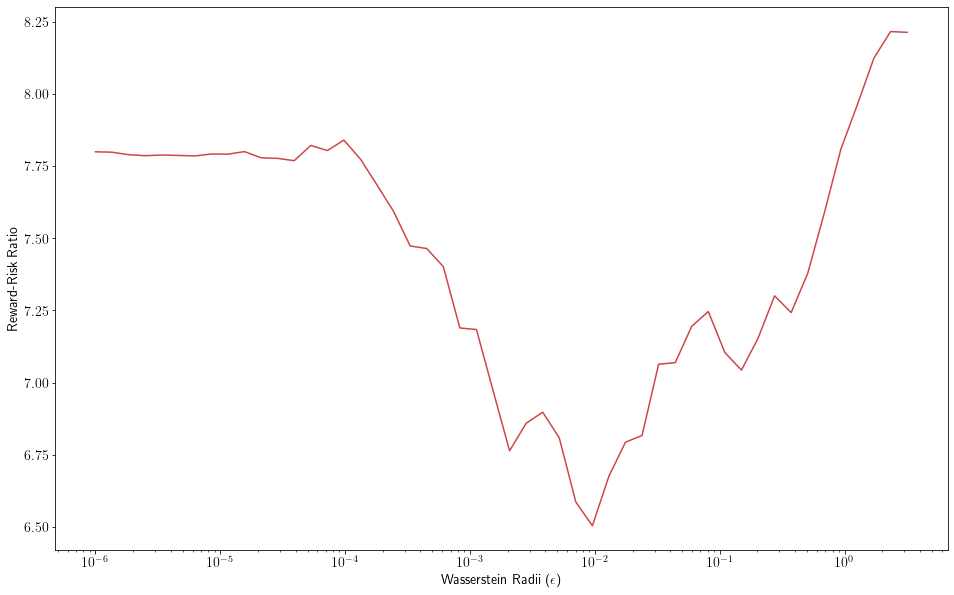

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LogNorm

# Set font size
fontSizeTickers = 14
fontSize = 14

# Specify colors
myMap = plt.get_cmap('inferno')  # Paired, inferno
colors = myMap(np.linspace(10**(-6), 1, 10))

# Prepare plots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))
plt.xticks(fontsize=fontSizeTickers)
plt.yticks(fontsize=fontSizeTickers)
ax.tick_params(axis='x', labelsize=fontSize)  # Increase x-axis tick label font size
ax.tick_params(axis='y', labelsize=fontSize)  # Increase y-axis tick label font size

# Compute the ratio
ratio = np.mean(OoS_EXCESS, axis=0)[:-1]/np.mean(OoS_CVaR, axis=0)[:-1]

# Plot the OoS-performance
ax.plot(epsCollection, ratio, color=colors[5])

ax.set_xlabel(r'Wasserstein Radii ($\epsilon$)', fontsize=fontSize)
ax.set_ylabel(r'Reward-Risk Ratio', fontsize=fontSize)
ax.set_xscale('log')  # Set x-axis to log scale

# Show figure
plt.show()